In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
changingjob_train = 'changingjob_train.csv'
changingjob_test = 'changingjob_testx.csv'

In [3]:
# 학습용 데이터
data_train = pd.read_csv(changingjob_train)
data_train

,Unnamed: 0,Unnamed: 0.1,city,city_development_Index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0,0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,30,NaN,Other,1,36,1
1,1,1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,3.0,Pvt Ltd,>4,47,0
2,2,2,city_21,0.624,Other,No relevent experience,Full time course,Graduate,STEM,5,NaN,Other,never,83,0
3,3,3,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,30,3.0,Funded Startup,4,8,0
4,4,4,city_176,0.764,Other,Has relevent experience,Part time course,Graduate,STEM,11,NaN,Other,1,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18121,18121,18121,city_103,0.920,Female,No relevent experience,no_enrollment,Phd,STEM,17,4.0,NGO,4,16,0
18122,18122,18122,city_21,0.624,Other,No relevent experience,Full time course,UH,NaN,9,NaN,Other,1,68,1
18123,18123,18123,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,30,2.0,Pvt Ltd,>4,110,0
18124,18124,18124,city_75,0.939,Male,Has relevent experience,no_enrollment,Masters,STEM,14,8.0,Pvt Ltd,1,82,0


In [4]:
# 테스트용 데이터
data_test = pd.read_csv(changingjob_test)
data_test

,Unnamed: 0,Unnamed: 0.1,city,city_development_Index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0,18126,city_128,0.527,Other,Has relevent experience,no_enrollment,Graduate,STEM,4,3.0,Pvt Ltd,4,36
1,1,18127,city_114,0.926,Other,Has relevent experience,no_enrollment,Graduate,STEM,16,4.0,Pvt Ltd,>4,8
2,2,18128,city_114,0.926,Male,Has relevent experience,no_enrollment,Graduate,STEM,12,8.0,Pvt Ltd,4,35
3,3,18129,city_67,0.855,Male,Has relevent experience,no_enrollment,Graduate,STEM,0,NaN,Other,1,41
4,4,18130,city_100,0.887,Male,Has relevent experience,no_enrollment,Graduate,STEM,2,5.0,Pvt Ltd,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,18521,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,Other,1,42
396,396,18522,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,Other,4,52
397,397,18523,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,30,3.0,Pvt Ltd,4,44
398,398,18524,city_65,0.802,Male,Has relevent experience,no_enrollment,UH,NaN,0,5.0,Pvt Ltd,2,97


In [5]:
# 학습용 데이터
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18126 entries, 0 to 18125
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              18126 non-null  int64  
 1   Unnamed: 0.1            18126 non-null  int64  
 2   city                    18126 non-null  object 
 3   city_development_Index  18126 non-null  float64
 4   gender                  18126 non-null  object 
 5   relevent_experience     18126 non-null  object 
 6   enrolled_university     18126 non-null  object 
 7   education_level         18126 non-null  object 
 8   major_discipline        15554 non-null  object 
 9   experience              18126 non-null  int64  
 10  company_size            12629 non-null  float64
 11  company_type            18126 non-null  object 
 12  last_new_job            18126 non-null  object 
 13  training_hours          18126 non-null  int64  
 14  target                  18126 non-null

In [6]:
# 테스트용 데이터
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              400 non-null    int64  
 1   Unnamed: 0.1            400 non-null    int64  
 2   city                    400 non-null    object 
 3   city_development_Index  400 non-null    float64
 4   gender                  400 non-null    object 
 5   relevent_experience     400 non-null    object 
 6   enrolled_university     400 non-null    object 
 7   education_level         400 non-null    object 
 8   major_discipline        343 non-null    object 
 9   experience              400 non-null    int64  
 10  company_size            279 non-null    float64
 11  company_type            400 non-null    object 
 12  last_new_job            400 non-null    object 
 13  training_hours          400 non-null    int64  
dtypes: float64(2), int64(4), object(8)
memory 

In [7]:
# 학습용 데이터
data_train.isna().sum()

Unnamed: 0                   0
Unnamed: 0.1                 0
city                         0
city_development_Index       0
gender                       0
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline          2572
experience                   0
company_size              5497
company_type                 0
last_new_job                 0
training_hours               0
target                       0
dtype: int64

In [8]:
# 테스트용 데이터
data_test.isna().sum()

Unnamed: 0                  0
Unnamed: 0.1                0
city                        0
city_development_Index      0
gender                      0
relevent_experience         0
enrolled_university         0
education_level             0
major_discipline           57
experience                  0
company_size              121
company_type                0
last_new_job                0
training_hours              0
dtype: int64

major_discipline과 company_size의 결측치에 관한 전처리가 필요해 보인다.
결측치가 생각보다 많아서 결측치가 포함된 열을 삭제하기보다는 다른 값으로 대체하는 것이 바람직해 보인다.
열이 중복되는 행은 보이지 않는다.

In [9]:
# 학습용 데이터
data_train.describe()

,Unnamed: 0,Unnamed: 0.1,city_development_Index,experience,company_size,training_hours,target
count,18126.000000,18126.000000,18126.000000,18126.000000,12629.000000,18126.000000,18126.000000
mean,9062.500000,9062.500000,0.829833,11.717533,4.258453,65.317941,0.247545
std,5232.669825,5232.669825,0.122993,9.544217,2.192552,60.010273,0.431598
min,0.000000,0.000000,0.448000,0.000000,1.000000,1.000000,0.000000
25%,4531.250000,4531.250000,0.743000,4.000000,3.000000,23.000000,0.000000
50%,9062.500000,9062.500000,0.910000,9.000000,4.000000,47.000000,0.000000
75%,13593.750000,13593.750000,0.920000,16.000000,6.000000,88.000000,0.000000
max,18125.000000,18125.000000,0.949000,30.000000,8.000000,336.000000,1.000000


In [10]:
# 테스트용 데이터
data_test.describe()

,Unnamed: 0,Unnamed: 0.1,city_development_Index,experience,company_size,training_hours
count,400.000000,400.000000,400.000000,400.000000,279.000000,400.000000
mean,199.500000,18325.500000,0.826368,11.582500,4.444444,67.517500
std,115.614301,115.614301,0.126472,9.399952,2.196211,63.874365
min,0.000000,18126.000000,0.479000,0.000000,1.000000,3.000000
25%,99.750000,18225.750000,0.724250,5.000000,3.000000,23.750000
50%,199.500000,18325.500000,0.903000,8.000000,4.000000,45.000000
75%,299.250000,18425.250000,0.920000,16.000000,6.000000,94.000000
max,399.000000,18525.000000,0.949000,30.000000,8.000000,332.000000


In [11]:
# company_size는 평균값으로 대체하는 시도이다.
data_train['company_size'] = data_train['company_size'].replace(to_replace = np.nan, value = round(data_train['company_size'].mean()))
data_test['company_size'] = data_test['company_size'].replace(to_replace = np.nan, value = round(data_test['company_size'].mean()))

In [12]:
# Unnamed 컬럼은 enrollee_id인데, 이 컬럼 데이터는 직원을 구분하기 위한 ID로서의 용도로 쓰인다.
# city 컬럼의 데이터는 city_development_Index가 충분히 그 정보를 대체할 수 있다고 판단한다.
# 이직을 생각 중인지에 관한 여부를 예측하는 데는 필요없는 정보이므로 삭제한다.
data_train = data_train.drop(['Unnamed: 0', 'Unnamed: 0.1', 'city'], axis = 1)
data_test = data_test.drop(['Unnamed: 0', 'Unnamed: 0.1', 'city'], axis = 1)

In [13]:
data_test

,city_development_Index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.527,Other,Has relevent experience,no_enrollment,Graduate,STEM,4,3.0,Pvt Ltd,4,36
1,0.926,Other,Has relevent experience,no_enrollment,Graduate,STEM,16,4.0,Pvt Ltd,>4,8
2,0.926,Male,Has relevent experience,no_enrollment,Graduate,STEM,12,8.0,Pvt Ltd,4,35
3,0.855,Male,Has relevent experience,no_enrollment,Graduate,STEM,0,4.0,Other,1,41
4,0.887,Male,Has relevent experience,no_enrollment,Graduate,STEM,2,5.0,Pvt Ltd,2,17
...,...,...,...,...,...,...,...,...,...,...,...
395,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,4.0,Other,1,42
396,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,4.0,Other,4,52
397,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,30,3.0,Pvt Ltd,4,44
398,0.802,Male,Has relevent experience,no_enrollment,UH,NaN,0,5.0,Pvt Ltd,2,97


In [14]:
# 범주형 컬럼과 연속형 컬럼이 각각 무엇인지 확인한다.
for i in data_train.columns:
    print("index: ", i)
    print(data_train[i].value_counts())
    print("\n")

index:  city_development_Index
0.920    4964
0.624    2533
0.910    1449
0.926    1270
0.698     632
         ... 
0.807       4
0.693       3
0.625       3
0.781       3
0.664       1
Name: city_development_Index, Length: 93, dtype: int64


index:  gender
Male      12594
Other      4352
Female     1180
Name: gender, dtype: int64


index:  relevent_experience
Has relevent experience    13135
No relevent experience      4991
Name: relevent_experience, dtype: int64


index:  enrolled_university
no_enrollment       13314
Full time course     3650
Part time course     1162
Name: enrolled_university, dtype: int64


index:  education_level
Graduate    10962
Masters      4189
UH           2572
Phd           403
Name: education_level, dtype: int64


index:  major_discipline
STEM               13980
Humanities           650
Other                369
Business Degree      314
Arts                 241
Name: major_discipline, dtype: int64


index:  experience
30    3138
5     1357
4     1326
3     1

In [15]:
# 범주형 컬럼에 관해 레이블 인코딩을 진행한다.
label_columns = ['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'company_type', 'last_new_job']
for column in label_columns:
    label_encoder = LabelEncoder()
    data_train[column] = label_encoder.fit_transform(data_train[column])
    data_test[column] = label_encoder.transform(data_test[column])

In [16]:
# 연속형 컬럼에 관해 레이블 인코딩을 진행한다.
value_columns = ['city_development_Index', 'experience', 'company_size', 'training_hours']
for column in value_columns:
    scaler = StandardScaler()
    total_value = pd.concat([data_train[column], data_test[column]]).to_numpy().reshape(-1, 1)
    scaler.fit(total_value)
    # 학습용 데이터 정규화
    train_value = data_train[column].values.reshape(-1, 1)
    scaled_train_value = scaler.transform(train_value)
    data_train[column] = pd.Series(scaled_train_value.reshape(-1))
    # 테스트용 데이터 정규화
    test_value = data_test[column].values.reshape(-1, 1)
    scaled_test_value = scaler.transform(test_value)
    data_test[column] = pd.Series(scaled_test_value.reshape(-1))

In [17]:
data_train

,city_development_Index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.733302,1,0,2,0,4,1.916579,-0.099705,3,1,-0.488661,1
1,-0.436831,1,1,2,0,4,0.344357,-0.644904,5,5,-0.305613,0
2,-1.671972,2,1,0,0,4,-0.703791,-0.099705,3,6,0.293451,0
3,-0.509965,1,0,2,1,4,1.916579,-0.644904,1,4,-0.954599,0
4,-0.534343,2,0,1,0,4,-0.074902,-0.099705,3,1,-0.688349,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18121,0.733302,0,1,2,2,4,0.553986,-0.099705,2,4,-0.821474,0
18122,-1.671972,2,1,0,3,5,-0.284532,-0.099705,3,1,0.043841,1
18123,0.733302,1,0,2,1,4,1.916579,-1.190102,5,5,0.742749,0
18124,0.887694,1,0,2,1,4,0.239542,2.081090,5,1,0.276810,0


In [18]:
data_test

,city_development_Index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,-2.460187,2,0,2,0,4,-0.808606,-0.644904,5,4,-0.488661
1,0.782057,2,0,2,0,4,0.449172,-0.099705,5,5,-0.954599
2,0.782057,1,0,2,0,4,0.029912,2.081090,5,4,-0.505301
3,0.205117,1,0,2,0,4,-1.227865,-0.099705,3,1,-0.405457
4,0.465146,1,0,2,0,4,-1.018236,0.445494,5,2,-0.804833
...,...,...,...,...,...,...,...,...,...,...,...
395,0.392013,1,1,2,0,2,0.239542,-0.099705,3,1,-0.388816
396,0.733302,1,0,2,0,4,0.239542,-0.099705,3,4,-0.222410
397,0.733302,1,0,2,0,4,1.916579,-0.644904,5,4,-0.355535
398,-0.225557,1,0,2,3,5,-1.227865,0.445494,5,2,0.526420


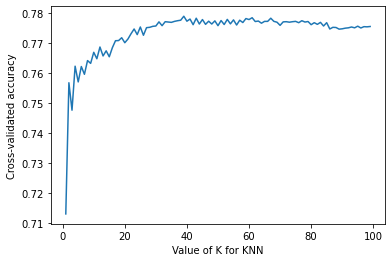

In [19]:
# 차원이 너무 커서 과대 적합이 될 가능성이 높다.
# PCA를 해야 할 필요성이 있어 보인다.
k_range = np.arange(1, 100)
k_scores = []

for k in k_range:
    knn = neighbors.KNeighborsClassifier(k)
    scores = cross_val_score(knn, data_train.drop('target', axis = 1), data_train['target'], cv = 10, scoring = 'accuracy')
    k_scores.append(scores.mean())
    
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
plt.show()

In [20]:
result = pd.DataFrame()
result['k'] = k_range
result['accuracy'] = k_scores
result = result.sort_values(by = 'accuracy', ascending = False).reset_index(drop=True)
result.head()

,k,accuracy
0,39,0.779047
1,61,0.778551
2,67,0.778385
3,43,0.778384
4,59,0.778275


In [21]:
classifier = neighbors.KNeighborsClassifier(result['k'][0])
classifier.fit(data_train.drop('target', axis = 1), data_train['target'])
pred = classifier.predict(data_test)

In [22]:
y_pred = pd.DataFrame(pred)
y_pred.columns = ['target']
y_pred['index'] = y_pred.index
y_pred = y_pred[['index', 'target']]

y_pred.to_csv("result_KNN.csv", header = True, index = False)